In [1]:
import pandas as pd              #import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
ds=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv",index_col=0) #load data from github side
ds

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
ds.shape 

(200, 4)

In [4]:
ds.info() # there is  no null values precent in data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
ds.isnull().sum() # no missing values count zero

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

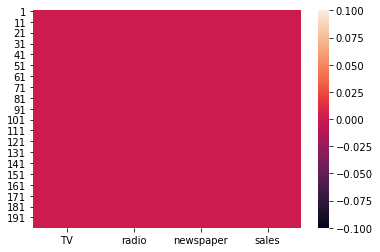

In [6]:
sns.heatmap(ds.isnull()) 

In [7]:
ds.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Observation:
       1. There are no considerable outliers present in the data.    
    
        2.Tere is  very less amount of skewness precent so we need not to reduce   

### Exploratory Data Analysis

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

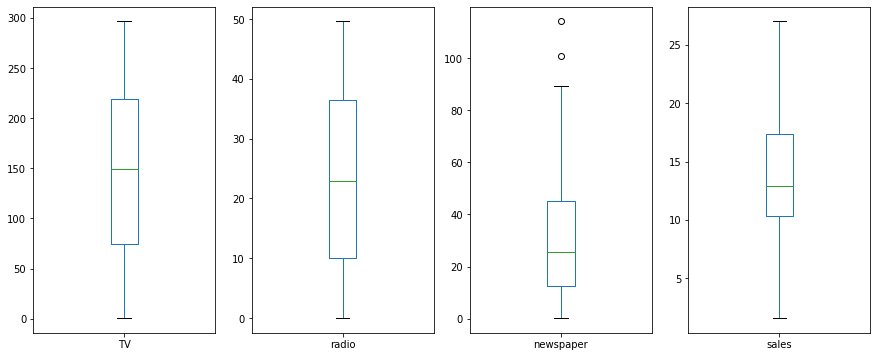

In [8]:
ds.plot(kind='box',subplots=True,figsize=(15,6))
#There are no considerable outliers present in the data.

### UNIVARIATE Analysis

<AxesSubplot:>

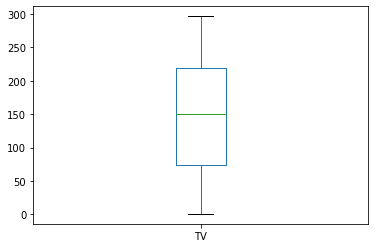

In [9]:
ds['TV'].plot.box()

<AxesSubplot:>

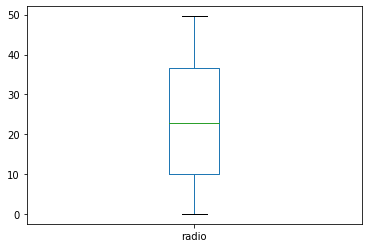

In [10]:
ds['radio'].plot.box()

<AxesSubplot:>

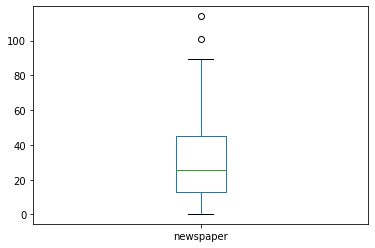

In [11]:
ds['newspaper'].plot.box()

#### lets see how sales are related with other variables using scatter plot
 ### Bivariant Analysis

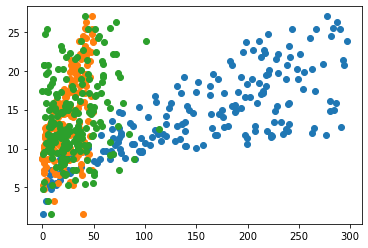

In [12]:
plt.scatter(ds['TV'],ds['sales'])
plt.scatter(ds['radio'],ds['sales'])
plt.scatter(ds['newspaper'],ds['sales'])

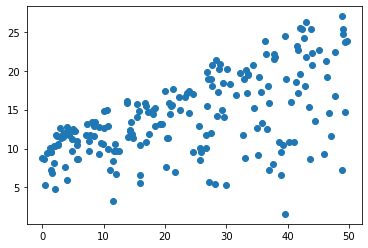

In [13]:
plt.scatter(ds['radio'],ds['sales'])

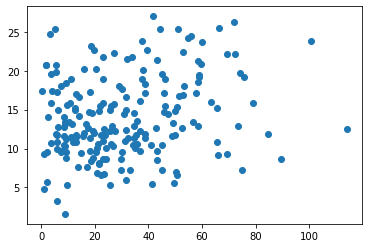

In [14]:
plt.scatter(ds['newspaper'],ds['sales'])

In [15]:
ds.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [16]:
ds.skew() 

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:ylabel='Frequency'>

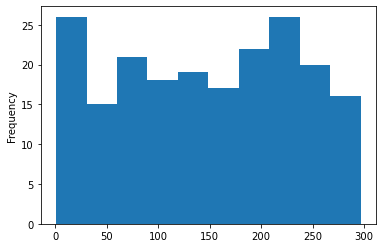

In [17]:
ds['TV'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

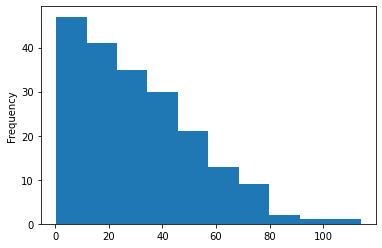

In [18]:
ds['newspaper'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

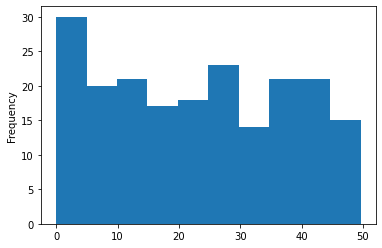

In [19]:
ds['radio'].plot.hist()

In [20]:
from scipy.stats import zscore #Removing minear outliear 
z=np.abs(zscore(ds))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [21]:
threshold=3 # Removing outliers
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [22]:
#lets see the correlation between diffrent variables
dscor=ds.corr()

<AxesSubplot:>

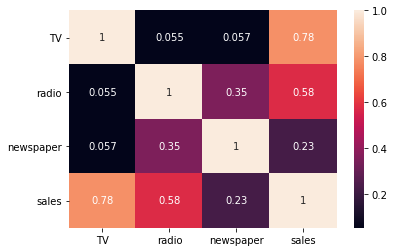

In [23]:
sns.heatmap(dscor,annot=True) 
#As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. 

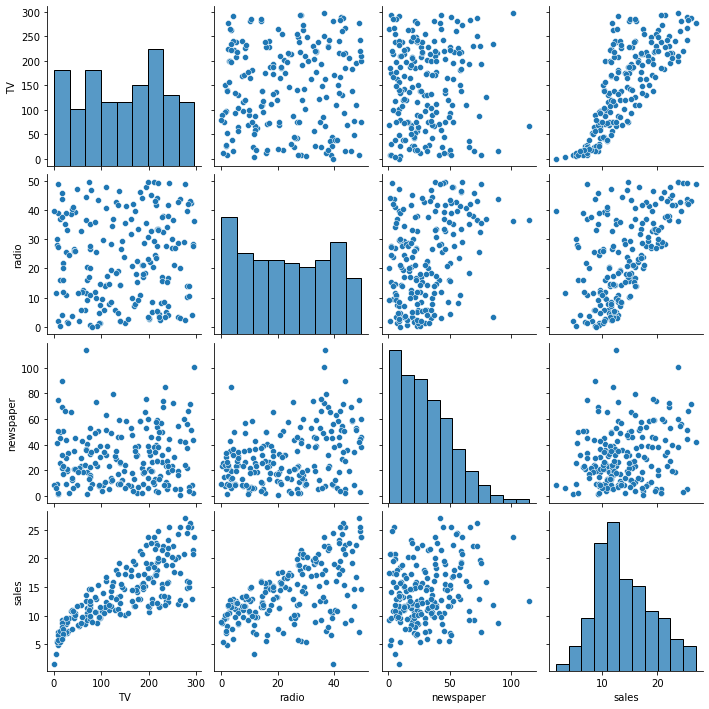

In [24]:
sns.pairplot(ds)

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. 

In [25]:
from sklearn.model_selection import train_test_split # import libraries for model devloping .
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler

In [26]:
x=ds.iloc[:,0:3]

In [27]:
y=ds.iloc[:,-1]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(200, 3) (134, 3) (66, 3)


In [30]:
print(y.shape,y_train.shape,y_test.shape)

(200,) (134,) (66,)


In [31]:
lr=LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
lr.coef_

array([0.04466512, 0.19663006, 0.00607439])

In [34]:
lr.intercept_

2.7580716192171053

In [35]:
lr.score(x_train,y_train)

0.9095216639030753

In [36]:
from sklearn.svm import SVR # Support VECtor Regressor
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.9020139476939449

In [37]:
pred=svr.predict(x_test)
pred

array([16.83283952, 21.60474974, 21.51412501, 11.67629891, 22.94702966,
       13.89774486, 21.69735071,  7.87830016, 13.28690382, 15.39203944,
        9.89743865,  6.86829855, 13.74468327,  9.94164683,  9.55930029,
       12.04608164,  9.61612585, 16.50774816, 10.77835493, 19.0592041 ,
       19.71736888, 13.89840844, 13.51511663, 21.50416002,  8.18660652,
        5.97096596, 21.36399504, 12.21009576,  9.46068565,  9.49394456,
       12.1727587 , 10.57666499, 22.1087953 , 13.3173432 , 17.93535153,
       20.54858453, 15.37608895, 20.83497995, 11.33834289,  4.80658856,
        9.78217816, 12.66669988, 10.80716934,  8.60260608, 13.13815137,
        5.70368025,  9.65950944, 14.54472416,  8.87465561, 12.3681958 ,
       16.55848153, 11.83573597, 14.09670728, 11.93828358,  6.66938982,
        9.90612804, 10.00670176, 24.3670163 ,  8.43293036, 12.28319188,
       17.39885841, 15.48434507, 11.71598802, 11.78124004, 16.2747015 ,
        7.54548573])

In [38]:
from sklearn.svm import SVR # Support VECtor Regressor
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.8117167353849744

In [39]:
from sklearn.svm import SVR # Support VECtor Regressor
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.8334411855983517

In [40]:
#try to minimize the coefficient variance
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9095216435931067

In [41]:
#try to minimize the coefficient variance
from sklearn.linear_model import Lasso,Ridge   # Best Model score 
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9095216634906489

### Cross validation SCore

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
score=cross_val_score(svr,x,y,cv=10)  # Support Vector Classifier
print(score)
print(score.mean())
print(score.std())

[0.85415713 0.90369881 0.91200097 0.83116511 0.83929855 0.78552748
 0.75580995 0.82927101 0.87242939 0.83580543]
0.8419163834650641
0.045523088480174174


In [44]:
score=cross_val_score(lr,x,y,cv=5) #linear Regression
print(score)
print(score.mean())
print(score.std())

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
0.8871063495438436
0.04034052587780576


In [45]:
score=cross_val_score(ls,x,y,cv=5)  #Losso
print(score)
print(score.mean())
print(score.std())

[0.87867049 0.91763535 0.92934384 0.81450667 0.89544737]
0.8871207441185953
0.04031742666624062


In [46]:
score=cross_val_score(rd,x,y,cv=5)      
print(score)                            # Ridge cross Validation got high score 
print(score.mean())
print(score.std())

[0.87865192 0.91763166 0.92933068 0.81444503 0.8954746 ]
0.8871067777046353
0.04033822291731066


### Tuning The Model : Hyperparameter tuning :GridSearch CV

In [47]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,1]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1]})
0.8871067777046353
1
{'alpha': 1}


In [48]:
#try to minimize the coefficient variance
from sklearn.linear_model import Lasso,Ridge   # Best Model score 
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9095216634906489

### The predict the total sales generated from all the sales channel.  

### Conclusion

In [49]:
#The predict the total sales generated from all the sales channel.  
pred=lr.predict(x_test)
print("Predict Result Scale",pred)
print("Actual Scale",y_test)

Predict Result Scale [16.58673085 21.18622524 21.66752973 10.81086512 22.25210881 13.31459455
 21.23875284  7.38400509 13.43971113 15.19445383  9.01548612  6.56945204
 14.4156926   8.93560138  9.56335776 12.10760805  8.86091137 16.25163621
 10.31036304 18.83571624 19.81058732 13.67550716 12.45182294 21.58072583
  7.67409148  5.67090757 20.95448184 11.89301758  9.13043149  8.49435255
 12.32217788  9.99097553 21.71995241 12.64869606 18.25348116 20.17390876
 14.20864218 21.02816483 10.91608737  4.42671034  9.59359543 12.53133363
 10.14637196  8.1294087  13.32973122  5.27563699  9.30534511 14.15272317
  8.75979349 11.67053724 15.66273733 11.75350353 13.21744723 11.06273296
  6.41769181  9.84865789  9.45756213 24.32601732  7.68903682 12.30794356
 17.57952015 15.27952025 11.45659815 11.12311877 16.60003773  6.90611478]
Actual Scale 96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
       ... 
98     15.5
32     11.9
13      9.2
36     12.8
120     6.6
Name: sales, Length: 66, dtype

In [50]:
print("error:")
print("mean absolute error:",mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root squared error:',np.sqrt(mean_squared_error(y_test,pred)) )

error:
mean absolute error: 1.4937750024728969
Mean squared error: 3.7279283306815096
Root squared error: 1.9307843822347202


In [51]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8555568430680086


### Saving Best Model

In [52]:
import pickle
filename='Advertising Sales Channel Prediction.pkl'
pickle.dump(rd,open(filename,'wb'))